# 📘 Clase 6 - Distribuciones y Detección de Outliers con Seaborn

## 🧾 Dataset

Trabajaremos con un conjunto de datos de una aseguradora que contiene información sobre clientes, sus características personales, tipos de pólizas y montos reclamados.

### 📋 Campos destacados:
- **CustomerLifetimeValue**: Valor estimado del cliente para la empresa.
- **ClaimAmount**: Monto reclamado por el cliente.
- **Coverage**: Tipo de cobertura contratada.
- **PolicyType** y **Policy**: Detalles del tipo de póliza.
- **VehicleClass** y **VehicleSize**: Tipo y tamaño del vehículo asegurado.
- **EmploymentStatus**, **Education**, **Gender**, etc.: Información demográfica.

Este dataset será usado para analizar distribuciones, detectar valores atípicos (outliers) y aplicar conceptos como asimetría y curtosis.

---


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore, skew, kurtosis

# Configuración estética
plt.style.use('ggplot')

# sns.set(font_scale=1.1) set is deprecated, use sns.set_theme instead
sns.set_theme(context='notebook', style='whitegrid', font_scale=1.1)

# Cargar datos
df = pd.read_csv("customer.csv")

# Vista previa
df.head()


,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [111]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'CustomerLifetimeValue', 'Response',
       'Coverage', 'Education', 'EffectiveToDate', 'EmploymentStatus',
       'Gender', 'Income', 'LocationCode', 'MaritalStatus',
       'MonthlyPremiumAuto', 'MonthsSinceLastClaim',
       'MonthsSincePolicyInception', 'NumberofOpenComplaints',
       'NumberofPolicies', 'PolicyType', 'Policy', 'RenewOfferType',
       'SalesChannel', 'ClaimAmount', 'VehicleClass', 'VehicleSize'],
      dtype='object')

### 📊 Ejercicio 1: Histograma y Curva de Densidad

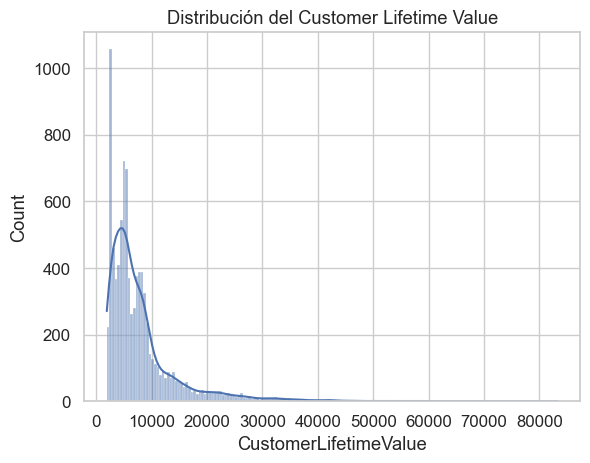

In [112]:
sns.histplot(df["CustomerLifetimeValue"], kde=True)
plt.title("Distribución del Customer Lifetime Value")
plt.show()


### 📦 Ejercicio 2: Detección de Outliers con Boxplot

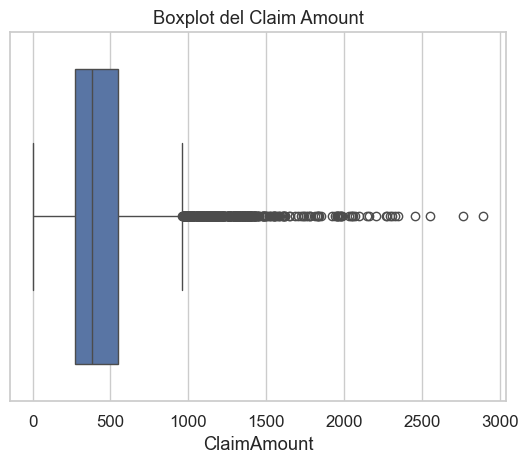

In [113]:
sns.boxplot(x=df["ClaimAmount"])
plt.title("Boxplot del Claim Amount")
plt.show()


### 🧮 Ejercicio 3: Detección de Outliers con IQR

In [114]:
Q1 = df["CustomerLifetimeValue"].quantile(0.25)
Q3 = df["CustomerLifetimeValue"].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df["CustomerLifetimeValue"] < Q1 - 1.5 * IQR) | 
                  (df["CustomerLifetimeValue"] > Q3 + 1.5 * IQR)]

print(f"Cantidad de outliers detectados por IQR: {outliers_iqr.shape[0]}")


Cantidad de outliers detectados por IQR: 817


### 🧠 Ejercicio 4: Detección de Outliers con Z-score

In [115]:
z_scores = zscore(df["ClaimAmount"])
outliers_z = df[np.abs(z_scores) > 3]

print(f"Cantidad de outliers detectados por Z-score: {outliers_z.shape[0]}")


Cantidad de outliers detectados por Z-score: 158


### 📈 Ejercicio 5: Boxplot por cobertura

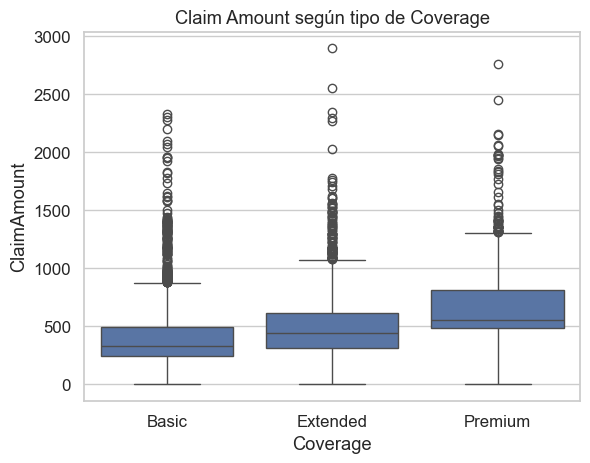

In [116]:
sns.boxplot(x="Coverage", y="ClaimAmount", data=df)
plt.title("Claim Amount según tipo de Coverage")
plt.show()


### 🎻 Ejercicio 6: Violinplot por clase de vehículo

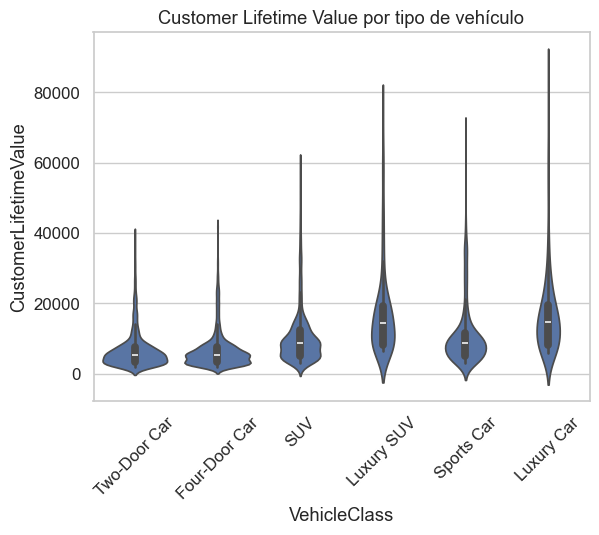

In [117]:
sns.violinplot(x="VehicleClass", y="CustomerLifetimeValue", data=df)
plt.xticks(rotation=45)
plt.title("Customer Lifetime Value por tipo de vehículo")
plt.show()


### 🔀 Ejercicio 7: Asimetría

In [118]:
skew_clv = skew(df["CustomerLifetimeValue"].dropna())
print(f"Asimetría (CustomerLifetimeValue): {skew_clv}")


Asimetría (CustomerLifetimeValue): 3.031782271327885


### ⛰️ Ejercicio 8: Curtosis

In [119]:
kurt_clv = kurtosis(df["CustomerLifetimeValue"].dropna())
print(f"Curtosis (CustomerLifetimeValue): {kurt_clv}")


Curtosis (CustomerLifetimeValue): 13.815310695287437


## 📝 Parte final: Actividades para resolver

1. ¿Cuál es el tipo de distribución que presenta `ClaimAmount`?
2. Identificá si hay outliers en `CustomerLifetimeValue` usando visualización.
3. Usá el método del IQR para detectar outliers en `MonthlyPremiumAuto`.
4. Usá el método del Z-score en `TotalClaimAmount` y reportá cuántos outliers hay.
5. Compará `ClaimAmount` según `Education` con un boxplot.
6. ¿Qué diferencias ves entre `VehicleSize` y `CustomerLifetimeValue`?
7. Calculá y analizá la asimetría de `MonthlyPremiumAuto`.
8. ¿Qué indica la curtosis de `TotalClaimAmount`?
9. Usá un `pairplot` con variables numéricas del dataset.
10. ¿Cómo puede afectar la presencia de outliers en un modelo predictivo?



☑️ 1. ¿Cuál es el tipo de distribución que presenta `ClaimAmount`?

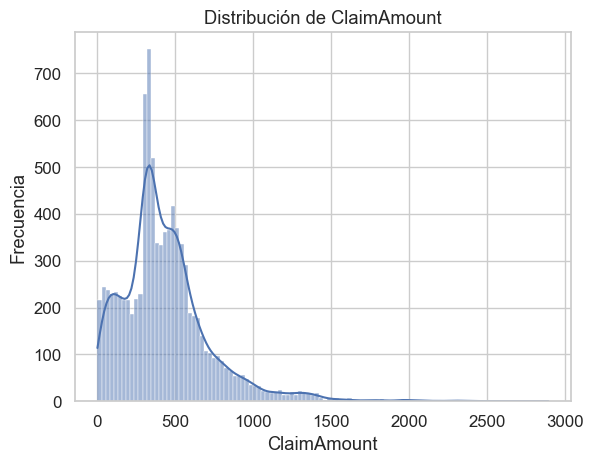

In [120]:
sns.histplot(df['ClaimAmount'], kde=True)
plt.title("Distribución de ClaimAmount")
plt.xlabel("ClaimAmount")
plt.ylabel("Frecuencia")
plt.show()

ClaimAmount presenta una distribución asimétrica positiva, con la mayoria de los valores concentrados en montos bajos y algunos valores altos que actuan como outliers.

☑️ 2. Identificá si hay outliers en `CustomerLifetimeValue` usando visualización.

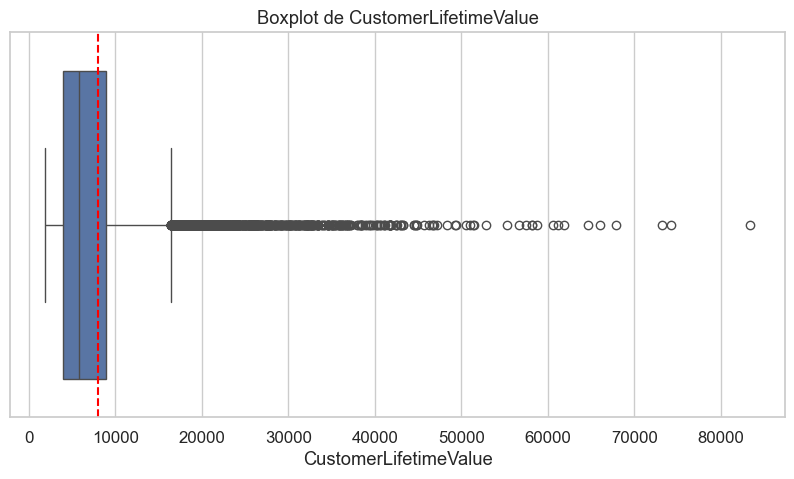

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["CustomerLifetimeValue"])
plt.axvline(x=df["CustomerLifetimeValue"].mean(), color='red', linestyle='--', label='Media')
plt.title("Boxplot de CustomerLifetimeValue")
plt.show()

El boxplot muestra que existen varios outliers en 'CustomerLifeTimeValue', ya que se observan puntos por fuera de los bigotes del gráfico.

Esto nos indica que hay clientes cuyo valor estimado para la empresa es significativamente mayor al promedio (trazado con la linea roja vertical)

☑️ 3. Usá el método del IQR para detectar outliers en `MonthlyPremiumAuto`.

In [122]:
Q1 = df["MonthlyPremiumAuto"].quantile(0.25)
Q3 = df["MonthlyPremiumAuto"].quantile(0.75)
IQR = Q3 - Q1

outliers_mpa = df[(df["MonthlyPremiumAuto"] < Q1 - 1.5 * IQR) |
                  (df["MonthlyPremiumAuto"] > Q3 + 1.5 * IQR)]

print(f"Cantidad de outliers detectados por IQR en MonthlyPremiumAuto es de: {outliers_mpa.shape[0]}")

Cantidad de outliers detectados por IQR en MonthlyPremiumAuto es de: 430


Se detectarón 430 outliers en 'MonthlyPremiumauto' utilizando el método del IQR

☑️ 4. Usá el método del Z-score en `TotalClaimAmount` y reportá cuántos outliers hay.

In [ ]:
#verificamos si la columna TotalClaimAmount existe
print("Existe" if "TotalClaimAmount" in df.columns else "No existe")

#hacemos el análisis de outliers con ClaimAmount
z_scores = zscore(df["ClaimAmount"].dropna())
outliers_z = df[np.abs(z_scores) > 3]
print(f"Cantidad de outliers detectados por Z-score en ClaimAmount: {outliers_z.shape[0]}")


No existe


,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
196,196,AZ62651,Oregon,9951.707743,No,Premium,High School or Below,2/17/11,Employed,M,...,1,0,1,Corporate Auto,Corporate L3,Offer4,Web,1836.000000,Luxury SUV,Medsize
248,248,FO35655,Oregon,8672.229719,No,Extended,Bachelor,1/14/11,Unemployed,M,...,83,0,1,Corporate Auto,Corporate L3,Offer1,Branch,2345.413441,Luxury SUV,Medsize
418,418,EM29359,Nevada,7126.596501,No,Basic,College,2/3/11,Medical Leave,M,...,63,0,1,Personal Auto,Personal L1,Offer2,Web,1317.600000,Luxury Car,Large
435,435,TE35785,California,6948.422239,No,Basic,Doctor,2/7/11,Unemployed,M,...,73,2,1,Personal Auto,Personal L3,Offer1,Branch,1337.063487,Luxury SUV,Large
496,496,JC11405,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,...,91,0,1,Personal Auto,Personal L3,Offer1,Agent,1324.800000,Luxury SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,8923,VF65251,California,6674.177684,No,Basic,College,1/3/11,Unemployed,M,...,14,0,1,Personal Auto,Personal L2,Offer4,Branch,1737.320276,Luxury SUV,Large
8943,8943,FM12425,California,19337.901030,No,Extended,College,2/8/11,Employed,M,...,39,0,7,Personal Auto,Personal L2,Offer1,Web,1321.584957,Luxury SUV,Medsize
9049,9049,UZ14076,California,32104.699570,No,Premium,High School or Below,2/16/11,Employed,F,...,18,1,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large
9103,9103,CZ57208,California,15245.254950,No,Basic,Bachelor,1/1/11,Employed,F,...,1,0,4,Personal Auto,Personal L3,Offer1,Agent,1329.957905,Luxury SUV,Large


☑️ 5. Compará `ClaimAmount` según `Education` con un boxplot.

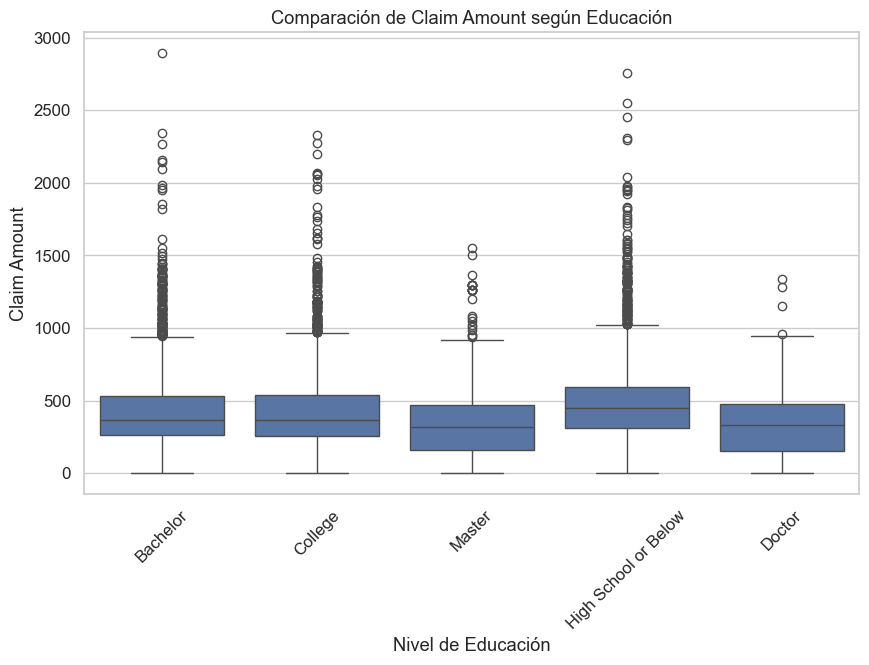

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education", y="ClaimAmount", data=df)
plt.title("Comparación de Claim Amount según Educación")
plt.xlabel("Nivel de Educación")
plt.xticks(rotation=45)
plt.ylabel("Claim Amount")
plt.show()

Las personas con educación universitaria o menor presentan una mayor variabilidad y montos atípicos más altos, mientras que Master y Doctor tienden a presentar menos dispersión y montos máximos más bajos

☑️ 6. ¿Qué diferencias ves entre `VehicleSize` y `CustomerLifetimeValue`?

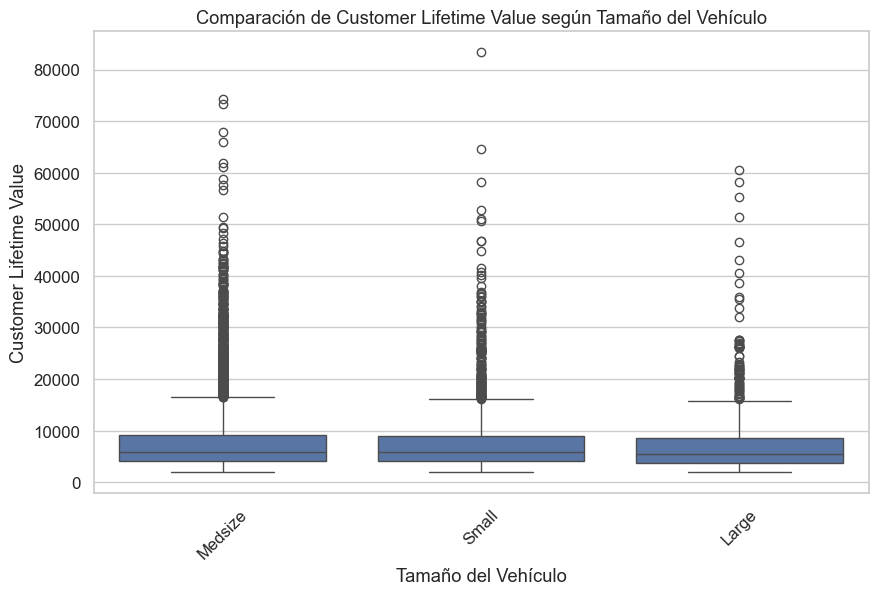

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="VehicleSize", y="CustomerLifetimeValue", data=df)
plt.title("Comparación de Customer Lifetime Value según Tamaño del Vehículo")
plt.xlabel("Tamaño del Vehículo")
plt.xticks(rotation=45)
plt.ylabel("Customer Lifetime Value")
plt.show()

'VehicleSize' es una variable categórica con valores (Medsize, Small, Large), en cambio 'CustomerLifetimeValue' es una variable numérica continua.

Se observa mayor variabilidad en el CustomerLifetimeValue para los vehículos Medsize y Small.

☑️ 7. Calculá y analizá la asimetría de `MonthlyPremiumAuto`.

In [134]:
skewness = df["MonthlyPremiumAuto"].dropna().skew()
print(f"Asimetría de MonthlyPremiumAuto: {skewness:.4f}")

if skewness > 0:
    print("La distribución de MonthlyPremiumAuto es asimétrica positiva.")
elif skewness < 0:
    print("La distribución de MonthlyPremiumAuto es asimétrica negativa.")
else:
    print("La distribución de MonthlyPremiumAuto es simétrica.")


Asimetría de MonthlyPremiumAuto: 2.1235
La distribución de MonthlyPremiumAuto es asimétrica positiva.


☑️ 8. ¿Qué indica la curtosis de `TotalClaimAmount`?

In [135]:
#verificamos si la columna TotalClaimAmount existe
print("Existe" if "TotalClaimAmount" in df.columns else "No existe")

No existe


☑️ 9. Usá un `pairplot` con variables numéricas del dataset.

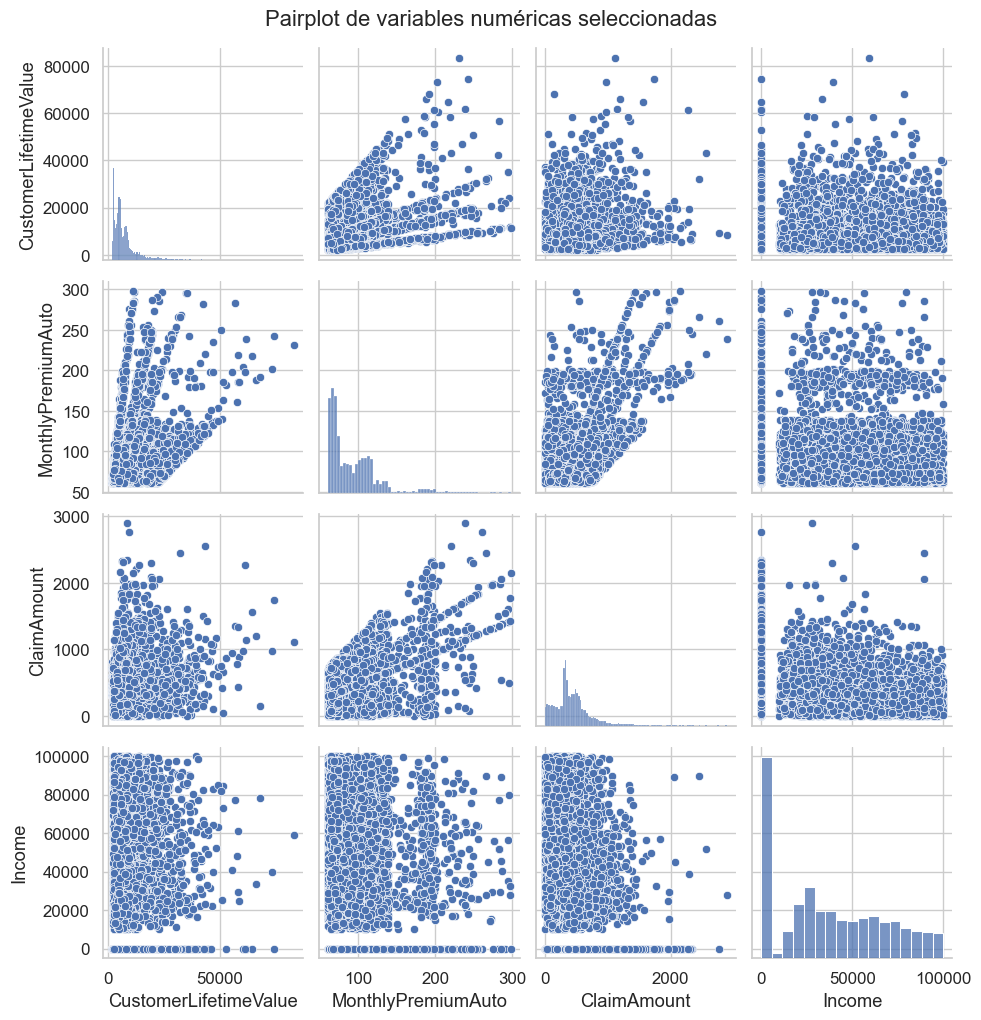

In [137]:
vars_to_plot = ['CustomerLifetimeValue', 'MonthlyPremiumAuto', 'ClaimAmount', 'Income']

sns.pairplot(df, vars=vars_to_plot)
plt.suptitle("Pairplot de variables numéricas seleccionadas", y=1.02)
plt.show()

☑️ 10. ¿Cómo puede afectar la presencia de outliers en un modelo predictivo?

A veces los outliers indican datos importantes (eventos raros, fraude, clientes especiales), otras veces pueden ser errores que convienen limpiar o tratar para mejorar el modelo.